In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   astropy.table           import Table

In [2]:
#sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

user = os.environ['USER']
sys.path.append('/cosma/home/durham/{}/DESI'.format(user))

In [3]:
from   gama_limits import gama_field
from   delta8_limits import delta8_tier

In [4]:
field = 'G9'

In [5]:
# Parameters
field = "G12"


In [6]:
#try:
#    gama_d8 = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold_ddp_n8.fits')
#except:
#    gama_d8 = Table.read('/cosma/home/durham/{}/data/GAMA4/gama_gold_ddp_n8.fits'.format(user))   
 
gama_d8 = Table.read('/cosma/home/durham/{}/data/GAMA4/gama_gold_ddp_n8.fits'.format(user))
gama_d8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64
377217,587727943491322176,136.90329419,1.55608748,19.152271,0.16247,4,G09_Y2_037_218,6,21.687529,20.259184,19.150333,18.680674,18.424824,548.2402622826361,38.69485463289714,G9,341.5432086798863,-324.98490369761384,12.46453978628196,1.1088505,0.9342401594521886,0,6,-0.020740287022880333,0.15387003265093574,0.2058293080926507,0.5405303736422161,0.7741494135764111,0.8,-0.1575959,-0.129976,-19.590816767556486,-19.61843666587573,38.74308803830844,38.77070793662769,0.64772797,0.20989986573691896,0.0,-7.1522713,0.006982059515270054,0.0,0 .. 0,287.57277875785763,374399,0.0,0.3431778460418994,42,73,0,9.599964863328967,8.990373079520078,-1.0
171040,587725040627351704,176.76489998,-2.36852638,16.70401,0.13018,4,G12_Y6_073_071,6,19.75952,17.755087,16.678097,16.245657,15.858553,429.93877811995094,38.16703308932081,G12,379.27596761304136,-24.63653794054611,-16.101689577872936,1.0769901,0.9946853195954285,0,6,-0.06111496492817901,0.021189843039869163,0.17204591829623853,0.4176988969754692,0.8313371488842459,0.8,-0.1262746,-0.104144,-21.508794397226385,-21.53092499833446,38.212804406992014,38.23493500810009,3.0959892,0.4072629716952041,0.0,-4.70401,0.016684336002373058,0.0,1 .. 0,0.8233108775454611,872396,1.768681422662734,0.551136160355333,66,95,0,9.371925976977439,7.095483458730778,-1.0
219914,587726013994959291,179.46494151,1.59719091,19.49665,0.17699,4,G12_Y2_014_386,5,21.095833,20.126966,19.480429,19.175507,18.905685,602.8608826265267,38.90108552522664,G12,511.94010562361603,-9.081648238574225,13.763210826183848,0.6465378,0.5137508646073005,0,3,-0.07690092866434485,0.05588598749007348,0.12468787027559773,0.290228168207745,0.4809974828295715,2.12,-0.1716803,-0.37521878,-19.357442398273616,-19.15390392085281,38.8540930940744,38.650554616653594,0.30334854,0.20494235928354734,0.0,-7.4966507,0.0056576644730264285,0.0,0 .. 0,0.7922145931969147,477265,8.84618290345335,1.0603076384501076,16,26,0,0.3069605292809181,0.15164744551087472,-1.0
560374,588848899375825181,180.05173692,-0.42679837,19.665287,0.22384,4,G12_Y1_ED1_094,5,22.860611,20.945913,19.617064,19.174828,18.752277,784.9279681593307,39.47414901960982,G12,641.3239301665683,-4.807995345364819,-5.420552980617658,1.3288498,0.9623867512850702,0,6,0.06815157989162732,0.4346146210870258,0.2977904413572534,0.8258610646325234,0.8007791692051988,0.8,-0.2171248,-0.17907201,-19.889527638290414,-19.92758043560792,39.554814656112676,39.59286745343018,0.13471222,0.2356467181726171,0.0,-7.665287,0.008041622713499808,0.0,0 .. 0,0.7853646987726515,1631859,21.572949754584467,0.9885014043598188,19,0,0,0.6647563864419619,-1.0,-1.0
48006,587722982292455656,215.42459482,-0.7208216,18.141523,0.12539,5,342293389884024832,6,21.051685,19.10003,18.096235,17.719065,17.459038,412.76810050759934,38.078530634122494,G15,300.62617672095644,210.06118462121867,-4.915638592584356,1.0037956,0.9368907854915748,0,6,-0.06997661033636625,-0.0030717720486441585,0.15688202429619325,0.38

In [7]:
gama_d8['FIELD'] = gama_field(gama_d8['RA'], gama_d8['DEC'])

In [8]:
np.unique(gama_d8['FIELD'].data)

array(['G12', 'G15', 'G9'], dtype='<U4')

In [9]:
gama_d8 = gama_d8[gama_d8['FIELD'] == field]

In [10]:
# gama_d8 = gama_d8[gama_d8['FILLFACTOR'] > 0.8]

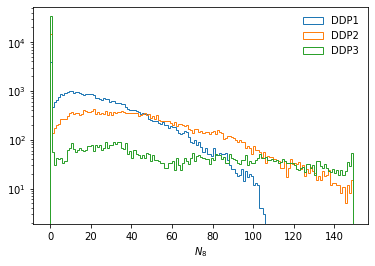

In [11]:
bins=np.arange(-1., 150., 1.)

_ = pl.hist(gama_d8['DDP1_N8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_N8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_N8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$N_8$')
pl.yscale('log')
pl.legend(frameon=False)

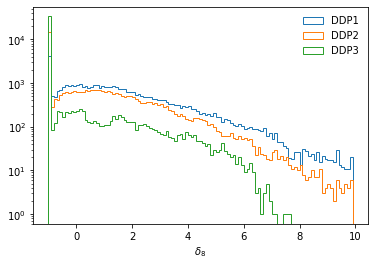

In [12]:
bins=np.arange(-1., 10., 0.1)

_ = pl.hist(gama_d8['DDP1_DELTA8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_DELTA8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_DELTA8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$\delta_8$')
pl.yscale('log')
pl.legend(frameon=False)

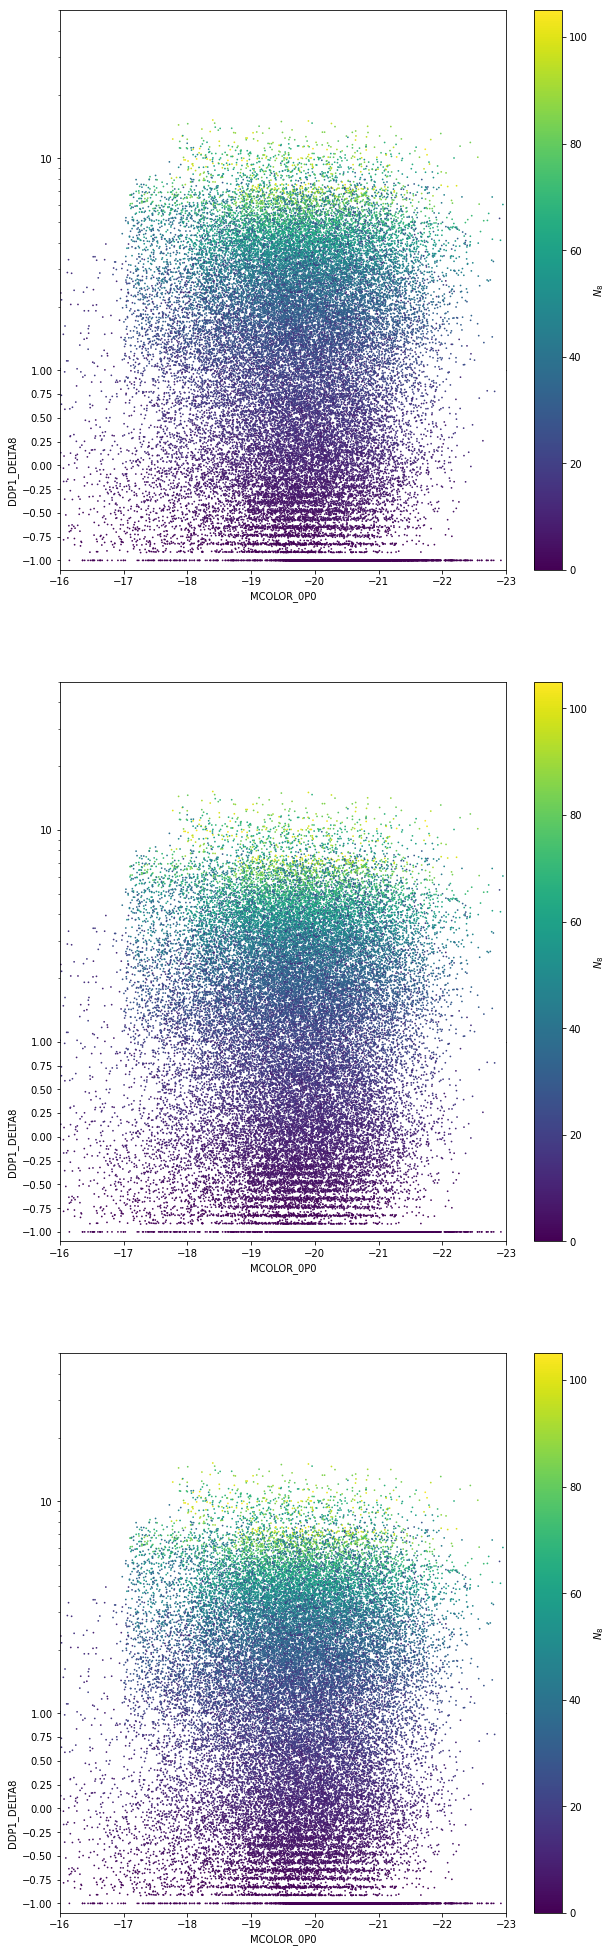

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    sc = ax.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    ax.set_xlabel('MCOLOR_0P0')
    ax.set_ylabel('DDP1_DELTA8')

    ax.set_xlim(-23., -16.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_xlim((-16., -23.))
    axLog.set_ylim((1., 50.))
    axLog.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    axLog.spines['bottom'].set_visible(False)
    axLog.xaxis.set_ticks_position('top')
    axLog.xaxis.set_visible(False)

    axLog.set_yticks([10.])
    axLog.set_yticklabels(['10'])
    
    ax.set_title('DDP{}'.format(idx+1))

    colorbar = fig.colorbar(sc, ax=ax, label=r'$N_8$')

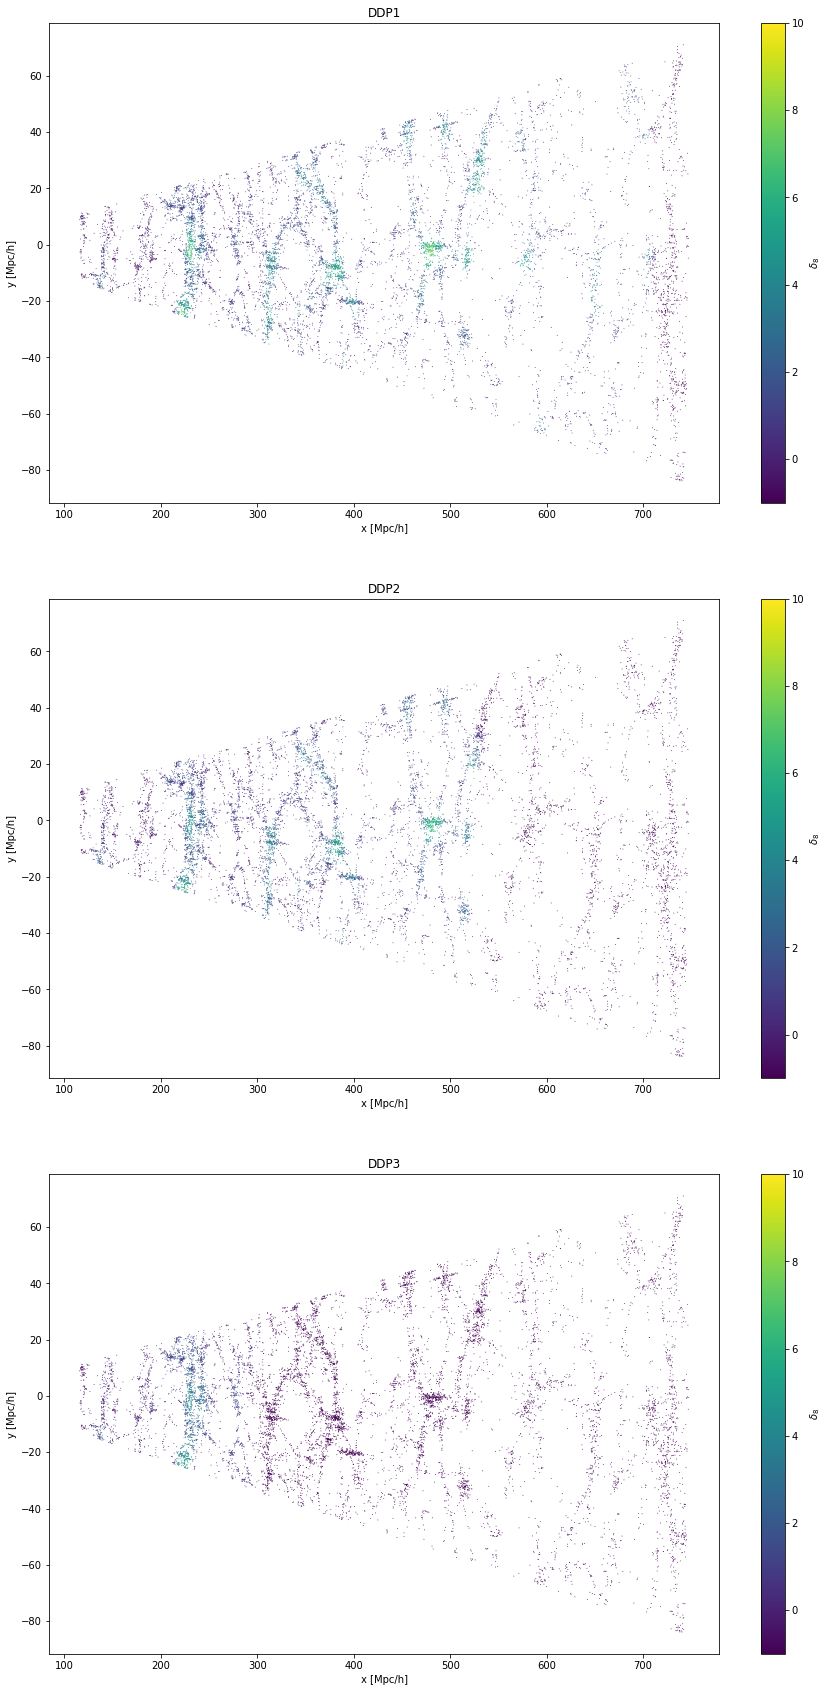

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(15, 30))

gama_d8_slice = gama_d8[np.abs(gama_d8['CARTESIAN_Z']) < 5.]

for idx in range(3):
    sc = axes[idx].scatter(gama_d8_slice['CARTESIAN_X'],\
                           gama_d8_slice['CARTESIAN_Y'],\
                           c=gama_d8_slice['DDP{}_DELTA8'.format(idx+1)],\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    # axes[idx].set_ylim(100., -100.)
    
    colorbar = fig.colorbar(sc, ax=axes[idx], label=r'$\delta_8$')    
    
    axes[idx].set_xlabel('x [Mpc/h]')
    axes[idx].set_ylabel('y [Mpc/h]')
    
    axes[idx].set_title('DDP{}'.format(idx+1))

In [15]:
tiers = delta8_tier(gama_d8['DDP1_DELTA8'])

In [16]:
np.unique(tiers, return_counts=True)

(array([-99,   0,   1,   2,   3]), array([19574,  4711,  3514,  7475,  5354]))

# Done.